In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

data = pd.read_csv("https://raw.githubusercontent.com/BamlakHun/Machine_Learning/refs/heads/main/FuelConsumptionCo2.csv")
data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


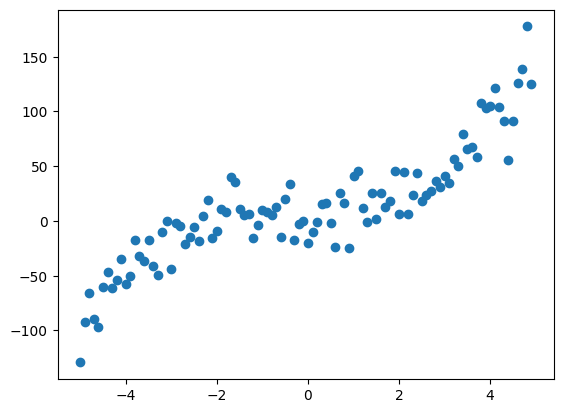

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-5,5,0.1)
y_noise = 20 * np.random.normal(size = len(x))
y = 1*(x**3) + 1*(x**2) + 1*x + 3+y_noise
plt.scatter(x,y);

In [3]:
x1 = x                  # One dimensional arrays
x2 = np.power(x1,2)
x3 = np.power(x1,3)
n = len(x1)

x1_new = np.reshape(x1,(n,1))  # Array of n rows and 1 column
x2_new = np.reshape(x2,(n,1))
x3_new = np.reshape(x3,(n,1))

In [4]:
x_bias = np.ones((n,1))

x_new = np.append(x_bias,x1_new,axis=1)
x_new = np.append(x_new,x2_new,axis=1)
x_new = np.append(x_new,x3_new,axis=1)

[7.38824495 0.94264027 0.80500914 0.99146457]


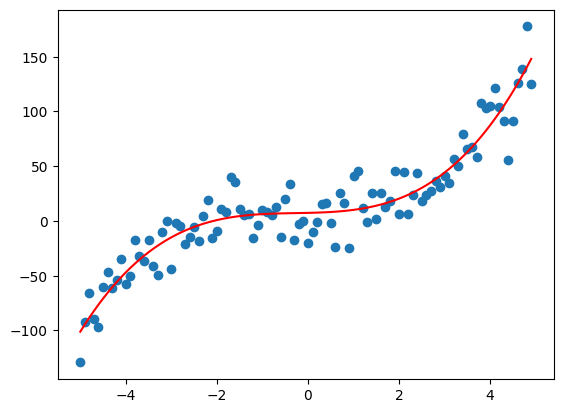

In [5]:
x_new_transpose = np.transpose(x_new)

x_new_transpose_dot_x_new = x_new_transpose.dot(x_new)

temp_1 = np.linalg.inv(x_new_transpose_dot_x_new)# Finding the dot product of transposed x and y :
temp_2 = x_new_transpose.dot(y)

theta = temp_1.dot(temp_2)
print(theta)

beta_0 = theta[0]
beta_1 = theta[1]
beta_2 = theta[2]
beta_3 = theta[3]

plt.scatter(x,y)
plt.plot(x,beta_0 + beta_1*x1 + beta_2*x2 + beta_3*x3,c="red")

In [6]:
def prediction(x1,x2,x3,beta_0,beta_1,beta_2,beta_3):
 y_pred = beta_0 + beta_1*x1 + beta_2*x2 + beta_3*x3
 return y_pred

pred = prediction(x1,x2,x3,beta_0,beta_1,beta_2,beta_3)

def err(y_pred,y):
 var = (y - y_pred)
 var = var*var
 n = len(var)
 MSE = var.sum()
 MSE = MSE/n

 return MSE
error = err(pred,y)
error

305.58487911327